# Exercise 3-1: Create some plots

In [4]:
import pandas as pd

## Get the data

In [5]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [6]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


## Visualize the data

<Axes: xlabel='Year', ylabel='DeathRate'>

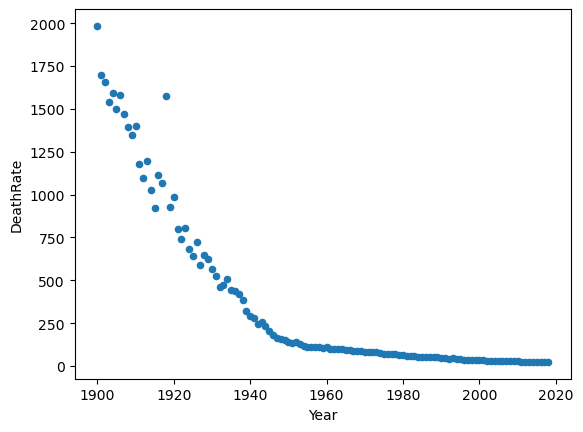

In [7]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

<Axes: xlabel='Year'>

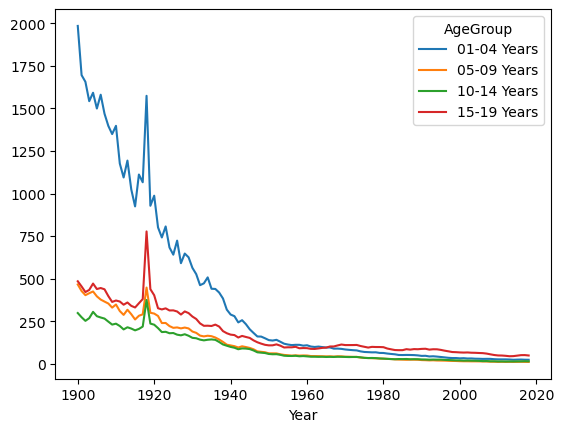

In [8]:
mortality_wide.plot()

In [9]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Mortality Rates for 15-19 Age Group'}, xlabel='Year'>

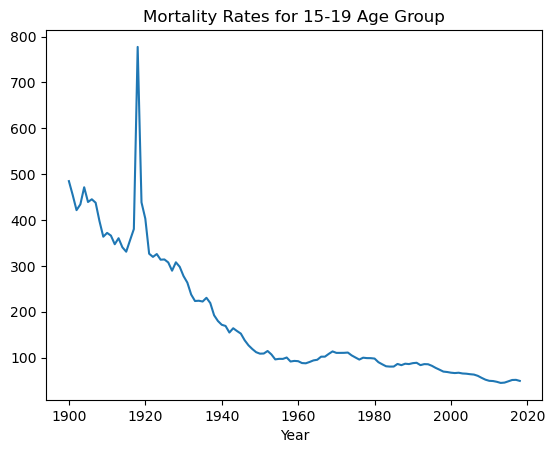

In [10]:
mortality_data.query('AgeGroup == "15-19 Years"').plot.line(x='Year', y='DeathRate', title='Mortality Rates for 15-19 Age Group', legend=False)            

<Axes: xlabel='Year'>

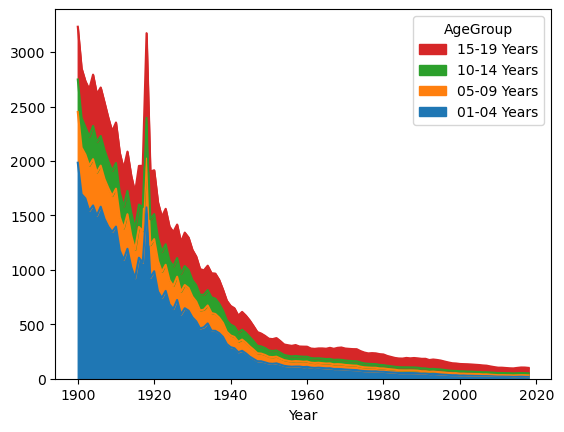

In [11]:
mortality_wide.plot.area(legend='reverse')


<Axes: xlabel='Year'>

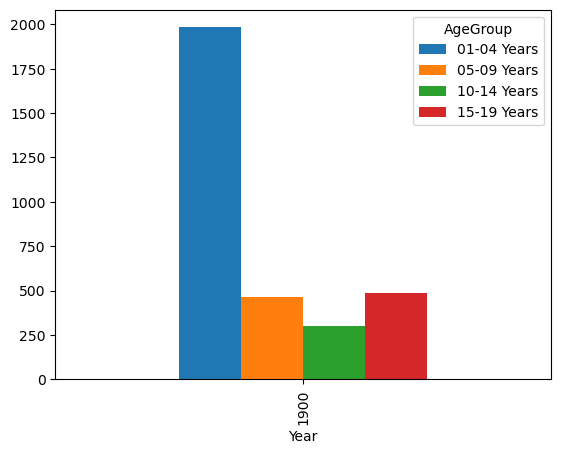

In [12]:
mortality_wide.query('Year in (1900,1900)').plot.bar()


<Axes: title={'center': 'Mortality Rate for year 2000'}>

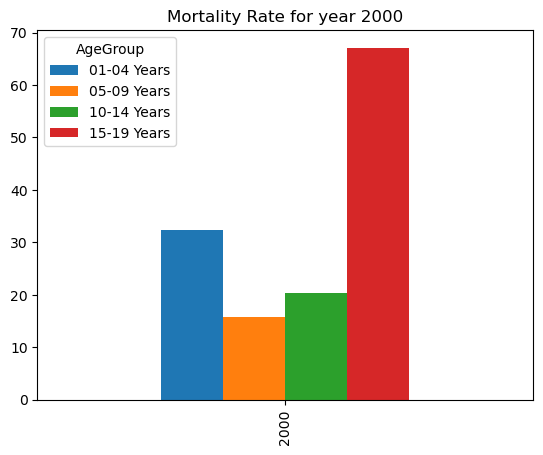

In [13]:
mortality_wide.query('Year in (2000,2000)').plot.bar(title= 'Mortality Rate for year 2000', xlabel='')


Text(0.5, 0, ' ')

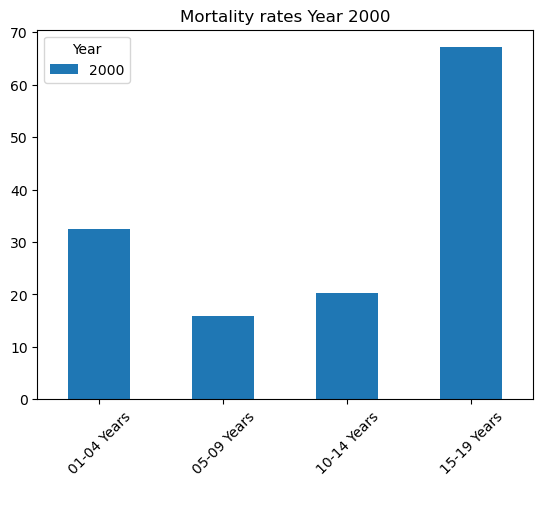

In [14]:
mortality_data.query('Year in (2000,2000)')\
.pivot(index='AgeGroup', columns='Year', values='DeathRate')\
.plot.bar(title='Mortality rates Year 2000', rot=45)
plt.xlabel(' ')

(array([309.,  69.,  45.,  21.,   5.,   4.,   4.,   2.,   5.,   0.,   3.,
          5.,   3.,   0.,   1.]),
 array([  11.4       ,  142.89333333,  274.38666667,  405.88      ,
         537.37333333,  668.86666667,  800.36      ,  931.85333333,
        1063.34666667, 1194.84      , 1326.33333333, 1457.82666667,
        1589.32      , 1720.81333333, 1852.30666667, 1983.8       ]),
 <BarContainer object of 15 artists>)

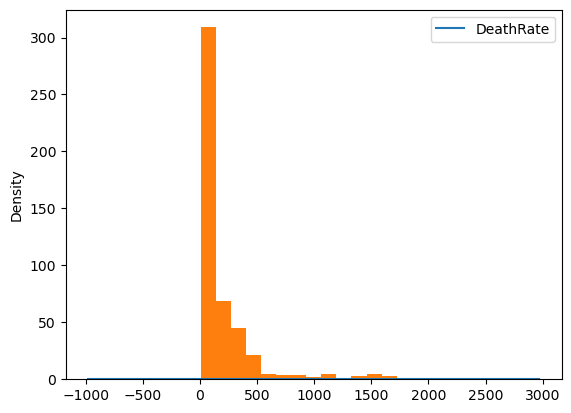

In [39]:
mortality_data.plot.density(y='DeathRate')
plt.hist(mortality_data['DeathRate'], bins=15)

<Axes: title={'center': 'Density plot of death rates in 1900'}, ylabel='Density'>

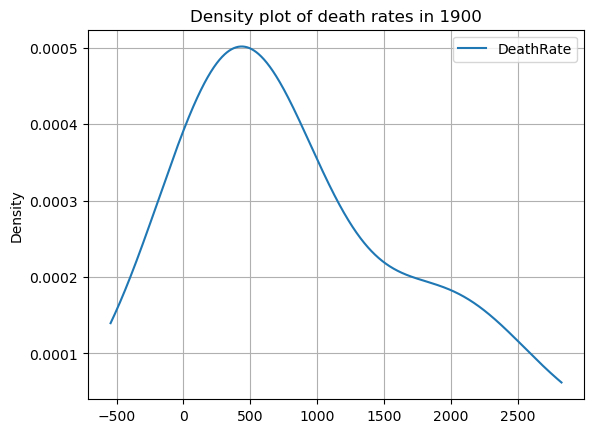

In [16]:
mortality_data.query('Year in (1900,1900)').plot.density(y='DeathRate', title= 'Density plot of death rates in 1900', grid=True)

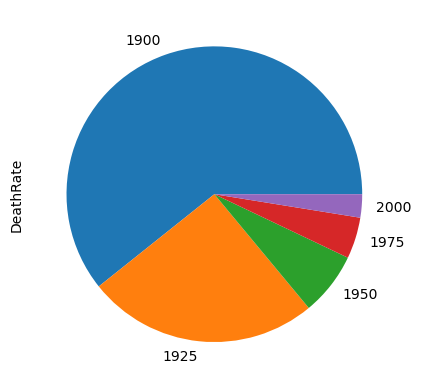

In [17]:
years_of_interest = [1900, 1925, 1950, 1975, 2000]
mortality_selected_years = mortality_data[mortality_data['Year'].isin(years_of_interest)]
sum_death_rates = mortality_selected_years.groupby('Year')['DeathRate'].sum()
sum_death_rates.plot(kind='pie')
plt.show()                                                   

array([[<Axes: title={'center': 'Child Mortality: 01-04'}, xlabel='Deaths per 100,000', ylabel='Year'>,
        <Axes: title={'center': 'Child Mortality: 05-09'}, xlabel='Deaths per 100,000', ylabel='Year'>],
       [<Axes: title={'center': 'Child Mortality: 10-14'}, xlabel='Deaths per 100,000', ylabel='Year'>,
        <Axes: title={'center': 'Child Mortality: 15-19'}, xlabel='Deaths per 100,000', ylabel='Year'>]],
      dtype=object)

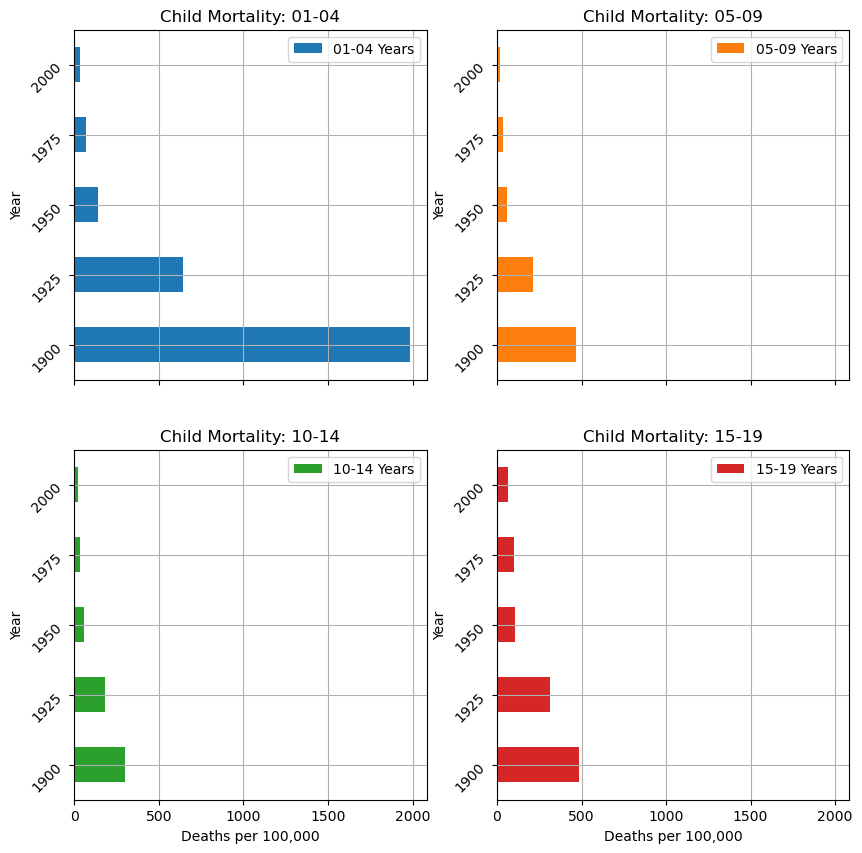

In [18]:
mortality_wide.query('Year in (1900,1925,1950,1975,2000)').plot.barh(
title=['Child Mortality: 01-04','Child Mortality: 05-09',
     'Child Mortality: 10-14','Child Mortality: 15-19'],
ylabel='Year',
xlabel='Deaths per 100,000',
grid=True, rot=45,
subplots=True, layout=(2,2), figsize=(10,10))